# 6th-Sense Interactive Analysis

This notebook demonstrates how to use the existing `Simply Setup` modules (`step00_auth`, `step00_config`) directly inside Jupyter for interactive analysis.

In [1]:
# 1. Setup & Imports
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Import our local modules
# Ensure you are running this notebook from the '10_Simple_Setup' directory
from step00_auth import KiteAuth
from step00_config import Config

%matplotlib inline

In [2]:
# 2. Auto-Login
try:
    auth = KiteAuth()
    kite = auth.login()  # Correct method call
    
    # Verify
    profile = kite.profile()
    print(f"✅ Logged in as: {profile['user_name']} ({profile['user_id']})")
except Exception as e:
    print(f"❌ Login Failed: {e}")

✅ Loaded existing access token from today
✅ Already logged in as Saroj Kumar Nayak
✅ Logged in as: Saroj Kumar Nayak (SRK118)


In [3]:
# 3. Fetch Historical Data (Interactive)
# Let's grab NIFTY 50 data for analysis

instrument_token = 256265 # NIFTY 50
interval = "minute"
days_back = 5

from_date = datetime.now() - timedelta(days=days_back)
to_date = datetime.now()

print(f"fetching data from {from_date.date()} to {to_date.date()}...")
data = kite.historical_data(instrument_token, from_date, to_date, interval)
df = pd.DataFrame(data)
print(f"Got {len(df)} rows.")
df.tail()

fetching data from 2026-01-13 to 2026-01-18...
Got 750 rows.


,date,open,high,low,close,volume
745,2026-01-16 15:25:00+05:30,25700.00,25702.60,25696.00,25698.00,0
746,2026-01-16 15:26:00+05:30,25697.90,25700.50,25693.60,25699.70,0
747,2026-01-16 15:27:00+05:30,25701.15,25705.60,25696.50,25699.65,0
748,2026-01-16 15:28:00+05:30,25698.10,25700.25,25692.20,25694.65,0
749,2026-01-16 15:29:00+05:30,25693.50,25710.75,25691.15,25701.90,0


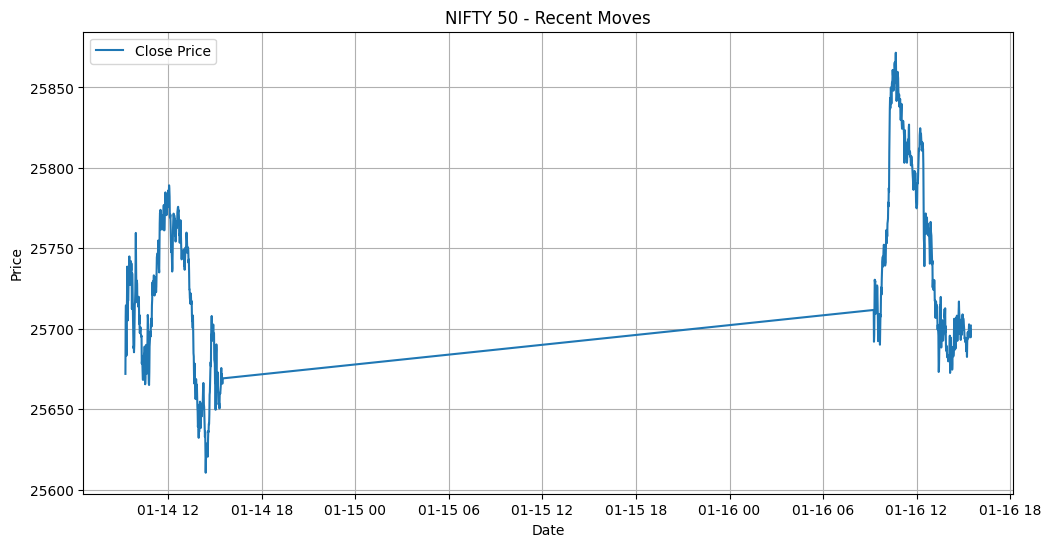

In [4]:
# 4. Visualize Data
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(df['date']), df['close'], label='Close Price')
plt.title("NIFTY 50 - Recent Moves")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

## How to Call Other Scripts

You can run the existing scripts directly from this notebook using two methods:

### Method A: Running the Script entirely
Use the `%run` magic command.

In [5]:
# This will run the backtest script exactly as if you ran it in the terminal
%run step03_backtest.py

🚀 Starting Backtest (SMA Crossover)...
✅ Loaded existing access token from today
✅ Already logged in as Saroj Kumar Nayak
📥 Fetching 30 days of data...
🧮 Calculating Indicators (SMA 9 & 21)...
🟢 BUY at 26157.45 (2025-12-22 14:15:00+05:30)
🔴 SELL at 26193.1 | PnL: 35.65
🟢 BUY at 25938.2 (2025-12-30 14:45:00+05:30)
🔴 SELL at 26151.3 | PnL: 213.10
🟢 BUY at 26160.4 (2026-01-01 14:45:00+05:30)
🔴 SELL at 26140.25 | PnL: -20.15
🟢 BUY at 26208.1 (2026-01-02 09:15:00+05:30)
🔴 SELL at 26296.3 | PnL: 88.20
🟢 BUY at 25689.05 (2026-01-12 13:15:00+05:30)
🔴 SELL at 25704.05 | PnL: 15.00
🟢 BUY at 25696.8 (2026-01-14 10:00:00+05:30)
🔴 SELL at 25663.2 | PnL: -33.60
🟢 BUY at 25857.5 (2026-01-16 10:15:00+05:30)
🔴 SELL at 25696.35 | PnL: -161.15

📊 BACKTEST RESULTS
Total Trades: 7
Net PnL:      137.05 points



<Figure size 640x480 with 0 Axes>

### Method B: Importing Functions
You can import specific functions from the scripts to use them in your own logic.

In [6]:
from step02_data_extraction import fetch_data

# Now call the function
fetch_data()

🚀 Starting Data Extraction...
✅ Loaded existing access token from today
✅ Already logged in as Saroj Kumar Nayak
📥 Fetching data for Token 256265...
📅 Period: 2026-01-13 to 2026-01-18
✅ Fetched 150 records.
💾 Saved to nifty_5min_data.csv

Sample Data:
                       date      open      high       low     close  volume
0 2026-01-14 09:15:00+05:30  25648.55  25719.35  25638.35  25683.25       0
1 2026-01-14 09:20:00+05:30  25684.20  25742.30  25680.50  25705.15       0
2 2026-01-14 09:25:00+05:30  25704.60  25744.80  25704.15  25737.50       0
3 2026-01-14 09:30:00+05:30  25737.70  25750.45  25722.20  25734.20       0
4 2026-01-14 09:35:00+05:30  25733.95  25746.60  25726.00  25732.85       0


In [7]:
%run step04_paper_trade.py

🚀 Starting Paper Trading Simulation...
This script simulates a strategy without placing real orders.

✅ Loaded existing access token from today
✅ Already logged in as Saroj Kumar Nayak
👀 Monitoring Instrument: 256265
Conditions: Buy if price > 20000 (Example condition)

--- Tick 1 ---
📈 LTP: 25694.35
⚡ SIGNAL: Buy Signal detected (LTP 25694.35 > 25684.35)
📝 PAPER ORDER: BUY 50 Qty @ Market (Mock)

--- Tick 2 ---
📈 LTP: 25694.35
⚡ SIGNAL: Buy Signal detected (LTP 25694.35 > 25684.35)
📝 PAPER ORDER: BUY 50 Qty @ Market (Mock)

--- Tick 3 ---
📈 LTP: 25694.35
⚡ SIGNAL: Buy Signal detected (LTP 25694.35 > 25684.35)
📝 PAPER ORDER: BUY 50 Qty @ Market (Mock)

--- Tick 4 ---
📈 LTP: 25694.35
⚡ SIGNAL: Buy Signal detected (LTP 25694.35 > 25684.35)
📝 PAPER ORDER: BUY 50 Qty @ Market (Mock)

--- Tick 5 ---
📈 LTP: 25694.35
⚡ SIGNAL: Buy Signal detected (LTP 25694.35 > 25684.35)
📝 PAPER ORDER: BUY 50 Qty @ Market (Mock)

✅ Paper Trade Session Complete.
